### Overview

For this project, the team was provided with a dataset from the Enron public email corpus. The corpus consisted primarily of legitimate emails with some spam emails already present in the corpus. Additional spam emails were added into the email corpus in order to have a sufficient number of spam examples to train a classifier.

The goal of the project was to determine the most effective features and models to classify spam versus legitimate emails. Throughout the course of the project, legitimate emails are refered to as "ham" emails. The process required the team to develop features that were applied to the the spam/ham email classification task and to demonstrate, through the use of experiments, which sets of features and models are most effective in classifying the email data.

To complete the required tasks in this project, the team used Python scripting in combination with various Python libraries. The primary libraries used in this project include: pandas, numpy, nltk, graphviz, matplotlib, sklearn, and tensorflow.

# Step 1:Data Processing

Before training classification models or running feature functions, the team processed and cleaned the data in order to ensure classification tasks used the highest quality and most standard data possible for training and testing.

The first step in data processing was importing the required libraries, modules, and packages into our Python script.

### Importing required libraries, module, and packages

In [1]:
# Import libraries

# !pip install graphviz
#!pip install pydotplus
!pip install wordcloud
!pip install tensorflow


import numpy as np
import pandas as pd
import sklearn
import nltk
import re
import os
import sys
import random as rd
import graphviz
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns
import string

from nltk.probability import FreqDist
from nltk.corpus import stopwords, sentence_polarity
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.collocations import*
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline

from IPython.display import Image
from wordcloud import WordCloud


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# import warnings
# warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Pre-processing

In the processSpamHam function, the team converted the data from the provided .txt files to a workable format. The team began this process using a base of the code provided in the FinalProjectData.zip. Some of the original code was altered to return additional lists that were required for later cleaning and filtering of the data.

In [5]:
import os
import random
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Set the directory path
dirPath = 'C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus'

# Function to read spam and ham files, train and test a classifier
def processSpamHam(dirPath, limit):
    # Convert the limit argument to an int
    limit = int(limit)
    
    # Initialize lists for spam and ham email texts
    hamtexts = []
    spamtexts = []
    
    # Ensure path is consistent and cross-platform
    spam_path = os.path.join(dirPath, "spam")
    ham_path = os.path.join(dirPath, "ham")
    
    # Process all files in the spam directory
    for file in os.listdir(spam_path):
        if file.endswith(".txt") and len(spamtexts) < limit:
            # Open file for reading and read entire file into a string
            with open(os.path.join(spam_path, file), 'r', encoding="latin-1") as f:
                spamtexts.append(f.read())
    
    # Process all files in the ham directory
    for file in os.listdir(ham_path):
        if file.endswith(".txt") and len(hamtexts) < limit:
            # Open file for reading and read entire file into a string
            with open(os.path.join(ham_path, file), 'r', encoding="latin-1") as f:
                hamtexts.append(f.read())
    
    # Print the number of emails read
    print("Number of spam files:", len(spamtexts))
    print("Number of ham files:", len(hamtexts))
    
    # Create a single list of mixed spam and ham email documents
    # List items are tuples: (list of tokenized words, label)
    emaildocs = []
    
    # Add the spam emails
    for spam in spamtexts:
        tokens = nltk.word_tokenize(spam)
        emaildocs.append((tokens, 'spam'))
    
    # Add the ham emails
    for ham in hamtexts:
        tokens = nltk.word_tokenize(ham)
        emaildocs.append((tokens, 'ham'))
    
    # Randomize the list
    random.shuffle(emaildocs)
    
    # Print a sample of tokenized emails
    print("\nSample tokenized emails (first 4):")
    for email in emaildocs[:4]:
        print(email)
        print()
    
    return emaildocs, spamtexts, hamtexts

# Example usage
limit = 100  # Specify the limit of emails to process
emaildocs, spamtexts, hamtexts = processSpamHam(dirPath, limit)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of spam files: 100
Number of ham files: 100

Sample tokenized emails (first 4):
(['Subject', ':', 'new', 'nat', 'gas', 'delivery', 'location', 'ed', 'and', 'elsa', 'here', "'", 's', 'is', 'some', 'suggested', 'language', ',', 'based', 'upon', 'our', 'conversation', '.', 'please', 'review', 'and', 'offer', 'comments', '.', 'fyi', ':', 'all', 'new', 'trade', 'components', '(', 'i', '.', 'e', '.', 'delivery', 'location', ')', 'require', 'the', 'review', 'of', 'legal', ',', 'david', 'forster', 'and', 'marcello', 'romano', 'for', 'approval', '.', 'the', 'transaction', 'is', 'for', 'delivery', 'of', 'pool', 'gas', 'via', 'the', 'houston', 'pipe', 'line', 'company', ',', 'as', 'scheduled', 'by', 'the', 'counterparty', ',', 'to', 'either', '(', 'i', ')', 'houston', 'ship', 'channel', 'zone', '10', ',', 'meter', '#', '7342', 'or', '(', 'ii', ')', 'houston', 'ship', 'channel', 'zone', '10', 'at', 'any', 'one', 'of', 'the', 'following', 'points', ':', 'brandywine', '(', 'meter', '#', '1505

### Tokenizing and filtering: lowercase, regex, stopword removal

In the cleanUpCleanUp function, the team tokenized and filtered, then removed stopwords from the data. This function starts by changing all email text to lowercase and tokenizing the emails. Then it filters all symbols and numbers from the emails. Next, it removes the stop word list from the email text. And, finally, it returns nine slightly varied lists to be used in later functions.

The first set of lists return just the tokenized emails with their "spam" or "ham" label. One list is only the ham emails (hamTokens), one list is only the spam emails (spamTokens), and one list is a shuffled combination of both the spam and the ham emails (emaildocsTokenized).

The second set of lists return the tokenized emails, labeled "spam" or "ham," with all symbols and numbers removed. One list is only the ham emails with symbols/numbers removed (hamAlpha), one list is only the spam emails with symbols/numbers removed (spamAlpha), and one list is a shuffled combination of both the spam and the ham emails with symbols/numbers removed (emaildocsAlpha).

The third set of lists return the tokenized emails, labeled "spam" or "ham," with all symbols/numbers removed and with stop words removed as specified in the "stopwords" list.

The team chose to use to nltk provided "english" stopword list with the goal of creating a classification framework that could be applied to all emails, not just the emails provided in this corpus. If the team had used a bespoke stop word list, created specifically from this dataset, it is likely the stop word list would not be as effective if new emails were added to the corpus. By using the provided NLTK "english" stop word list, which was created using a much broader corpus, the team ensured that this Python framework would be effective even if completely different email corpus data is plugged into the script.

In addition to the NLTK "english" stop word list, the team intentionally removed common names that were found in the "To:" lines of the emails. This decision was made so that this scripting framework does not base classification decisions off of email recipients as such data will not necessarily remain an accurate method of classification if the email corpus is altered.

Though for this project the team chose to use the provided NLTK "english" stop word list, the team included commented-out code that can be used to load a specific stop word file, if desired.

Similar to the above sets, there are three lists returned after tokenizing, filtering, and removing stopwords; one with only ham emails (hamStop), one with only spam emails (spamStop), and one with a shuffled combination of both the spam and the ham emails (emaildocsStop).

In [7]:
import re
import nltk

# Ensure necessary NLTK resources are downloaded
nltk.download('stopwords')

def cleanUpCleanUp(emaildocs):
    """
    Clean up and process email documents to prepare for analysis.

    Parameters:
    emaildocs (list): A list of tuples where each tuple contains
                      tokenized words and their label ('spam' or 'ham').

    Returns:
    tuple: Processed tokenized emails at various stages of cleaning:
           hamTokens, spamTokens, emaildocsTokenized, 
           hamAlpha, spamAlpha, emaildocsAlpha, 
           hamStop, spamStop, emaildocsStop
    """
    # Initialize lists for tokenized words from master emaildocs
    spamTokens = []
    hamTokens = []
    emaildocsTokenized = []
    
    # Make everything lowercase and separate spam/ham tokens
    for item in emaildocs:
        email = item[0]
        if item[1] == "spam":
            spamTokens.extend(word.lower() for word in email)
        else:
            hamTokens.extend(word.lower() for word in email)

    # Tokenize and organize email docs
    for item in emaildocs:
        tokenList = [word.lower() for word in item[0]]
        emaildocsTokenized.append((tokenList, item[1]))

    # Regex filter for alphabetic characters only
    spamAlpha = [word for word in spamTokens if re.match('^[a-z]+$', word)]
    hamAlpha = [word for word in hamTokens if re.match('^[a-z]+$', word)]

    emaildocsAlpha = [
        ([word for word in item[0] if re.match('^[a-z]+$', word)], item[1])
        for item in emaildocsTokenized
    ]

    # NLTK stopwords
    nltkStopwords = nltk.corpus.stopwords.words('english')
    # Adding custom stopwords
    moreStopwords = [
        'daren', 'hou', 'ect', 'subject', 'could', 'would', 'might', 
        'must', 'need', 'sha', 'wo', 'y', "'s", "'d", "'ll", "'t", "'m", "'re", "'ve"
    ]
    stopwords = set(nltkStopwords + moreStopwords)

    # Remove stopwords from the lists
    hamStop = [word for word in hamAlpha if word not in stopwords]
    spamStop = [word for word in spamAlpha if word not in stopwords]

    emaildocsStop = [
        ([word for word in item[0] if word not in stopwords], item[1])
        for item in emaildocsAlpha
    ]

    return (hamTokens, spamTokens, emaildocsTokenized, 
            hamAlpha, spamAlpha, emaildocsAlpha, 
            hamStop, spamStop, emaildocsStop)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Splitting training/testing data

After finishing the actual cleaning of the data, the team wrote several functions to prepare the data for classification tasks. In order to train our models and then test their accuracy, the team needed to split the provided corpus into training and testing data. This function used the numpy library to gather a random sampling of 75% of the data for training. The remaining 25% was set aside for testing the accuracy and precision of our models after they were trained. Additionally, this function replaced the words "spam" and "ham" with numbers (spam = 1, ham = 0) because the labels needed to be in a format that classifiers could understand. To store the emails and their labels, a list of lists was created that composed of the tokens of the email as one value, a 1 or 0 as the second value. Upon completion, this function returns two lists: testList and trainList.

In [9]:
def trainTestSplit(emaildocsStop):
    prepList = []
    trainList = []
    testList = []
    listA = []
    # change ham = 0, spam = 1
    for email in emaildocsStop:
        if email[1] == "ham":
            listA = [email[0],0]
            prepList.append(listA)
        else:
            listA = [email[0],1]
            prepList.append(listA)
        listA = []

    # use numpy to get a random selection of 75% of data for training
    for item in prepList:
        if np.random.uniform(0,1) < 0.75:
            trainList.append(item)
        else:
            testList.append(item)
    print(len(testList))
    print(len(trainList))

    return testList, trainList

### Re-joining tokenenized emails

The sklearn modules that the team chose to use to train our models for classification required the emails to be one continuous string for processing. In order to retain the data processing the team had already done (filtering, stop words, lowercase, etc), the team simply rejoined the tokenized, cleaned emails into a single string again. This function takes in a vectorized list and returns a list of continuous email strings and their labels.




In [11]:
def join(testList, trainList):
    """
    Joins tokenized lists of words into single strings for vectorization and training.

    Parameters:
    testList (list): A list of test data tuples in the format (tokenized words, label).
    trainList (list): A list of training data tuples in the format (tokenized words, label).

    Returns:
    tuple: Two lists (joinedTestList, joinedTrainList) where each entry is a list [joined string, label].
    """
    # Joining tokenized words into a single string for each email
    joinedTestList = [[ ' '.join(email[0]), email[1]] for email in testList]
    joinedTrainList = [[ ' '.join(email[0]), email[1]] for email in trainList]

    return joinedTestList, joinedTrainList


### To CSV for later processing

TensorFlow is easiest to use when data is stored in a CSV file. Using pandas, we wrote our data to the out.csv file for later processing using TensorFlow.

In [15]:
import pandas as pd

def toCSV(emaildocsJoined, output_file='C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus/email.csv'):
    """
    Converts a list of email documents into a CSV file.

    Parameters:
    emaildocsJoined (list): A list of email data in the format [[message, category], ...].
    output_file (str): The name of the output CSV file (default is 'email.csv').

    Returns:
    None: Saves the data to a CSV file.
    """
    # Initialize column names
    columnNames = ['Category', 'Message']
    
    # Create a DataFrame using the email data
    df = pd.DataFrame(emaildocsJoined, columns=['Message', 'Category'])
    
    # Write the DataFrame to a CSV file without an index
    df.to_csv(output_file, index=False)

    print(f"Data successfully saved to {output_file}")


### STEP 2: FEATURE ENGINEERING

After processing and cleaning the data, the team constructed various feature functions that were used to demonstrate different aspects of the data and some to create more specific datasets that were fed into the team's classification tasks. The team included screenshots of the execution of this code.



## Feature 1: Frequency Analysis

Feature 1 performs freqency analysis on any tokenized lists that are fed into it, printing out lists of the top 30 most commonly used words from each list.


Ham Most Common Words:
    Word  Frequency
0    ham          4
1   this          1
2     is          1
3      a          1
4  email          1

Spam Most Common Words:
    Word  Frequency
0   spam          3
1   this          1
2     is          1
3      a          1
4  email          1


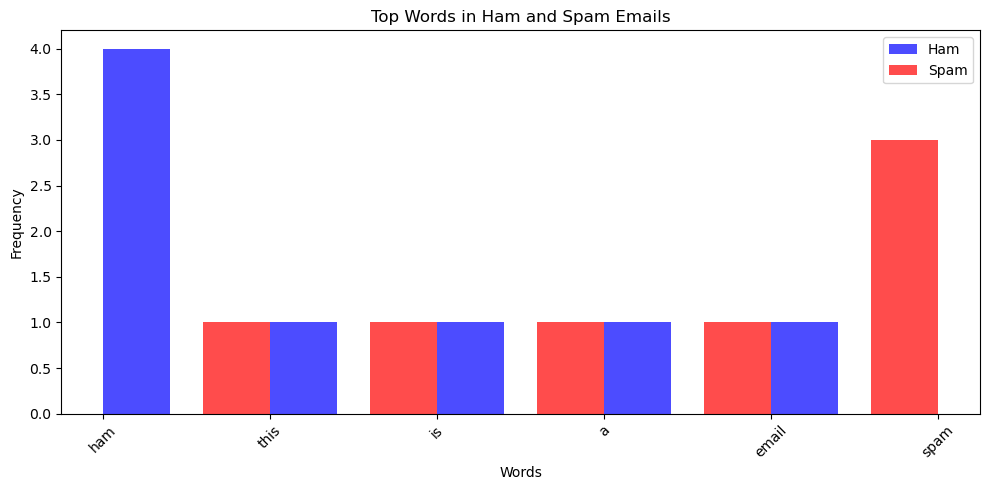

In [17]:
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt

# Example implementation of the function
def frequencyAnalysis(hamList, spamList, top_n=30):
    """
    Analyze and display the most common words in ham and spam lists.

    Parameters:
    hamList (list): A list of words from ham emails.
    spamList (list): A list of words from spam emails.
    top_n (int): The number of most common words to display (default is 30).

    Returns:
    None: Displays the frequency analysis in tabular and graphical form.
    """
    # Frequency analysis for ham
    ham_dist = FreqDist(hamList)
    ham_items = ham_dist.most_common(top_n)
    ham_df = pd.DataFrame(ham_items, columns=['Word', 'Frequency'])

    print("\nHam Most Common Words:")
    print(ham_df)

    # Frequency analysis for spam
    spam_dist = FreqDist(spamList)
    spam_items = spam_dist.most_common(top_n)
    spam_df = pd.DataFrame(spam_items, columns=['Word', 'Frequency'])

    print("\nSpam Most Common Words:")
    print(spam_df)

    # Plotting the results
    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*ham_items), alpha=0.7, label='Ham', color='blue', width=0.4, align='edge')
    plt.bar(*zip(*spam_items), alpha=0.7, label='Spam', color='red', width=-0.4, align='edge')
    plt.title('Top Words in Ham and Spam Emails')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example data
hamList = ['this', 'is', 'a', 'ham', 'email', 'ham', 'ham', 'word', 'ham']
spamList = ['this', 'is', 'a', 'spam', 'email', 'spam', 'spam', 'offer', 'win']

# Test the function
frequencyAnalysis(hamList, spamList, top_n=5)


Number of spam files: 1000
Number of ham files: 1000

Sample tokenized emails (first 4):
(['Subject', ':', 'megan', 'jones', 'steve', '/', 'daren', ',', 'i', 'interviewed', 'this', 'candidate', 'and', 'really', 'liked', 'her', '.', 'she', 'has', 'previous', 'allocations', 'and', 'settlements', 'experience', ',', 'but', 'really', 'wants', 'to', 'do', 'financial', 'accounting', '.', 'as', 'you', 'will', 'see', 'on', 'her', 'resume', ',', 'she', 'is', 'doing', 'internal', 'auditing', 'at', 'foleys', '.', 'she', 'was', 'honest', 'with', 'me', 'that', 'she', 'did', 'not', 'necessarily', 'want', 'to', 'do', 'allocations', 'again', 'and', 'that', 'she', 'really', 'enjoyed', 'working', 'with', 'the', 'schedulers', 'and', 'traders', ',', 'although', 'she', 'doesn', "'", 't', 'necessarily', 'want', 'to', 'schedule', 'or', 'trade', '.', 'she', 'mentioned', 'risk', 'specifically', '.', 'i', 'think', 'she', 'would', 'be', 'an', 'asset', 'to', 'enron', '.', 'please', 'use', 'at', 'your', 'discretion

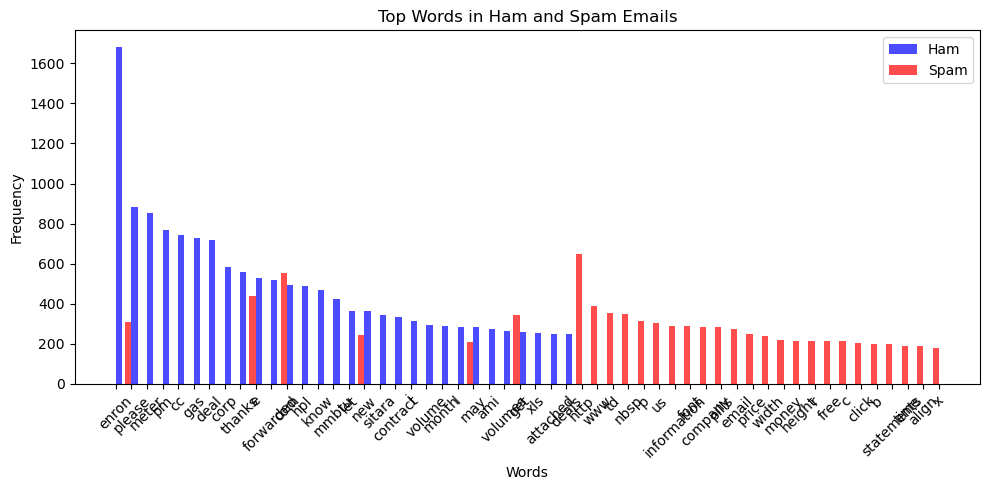

In [19]:
# Set the directory path and limit as variables
dirPath = 'C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus'
limit = 1000  # Replace this with the desired limit

# Process the spam and ham data
emaildocs, spamtexts, hamtexts = processSpamHam(dirPath, limit)

# Clean up and tokenize the email documents
hamTokens, spamTokens, emaildocsTokenized, hamAlpha, spamAlpha, emaildocsAlpha, hamStop, spamStop, emaildocsStop = cleanUpCleanUp(emaildocs)

# Perform frequency analysis
print("Frequency Analysis with symbols/numbers removed and stopwords filtered:")
frequencyAnalysis(hamStop, spamStop)


## Feature 2: Bigram Creation and Frequency Analysis

Feature 2 takes in an tokenized list and returns the top 30 most common bigrams from the list.

In [20]:
import nltk
from nltk.collocations import BigramCollocationFinder

def bigrams(hamList, spamList, top_n=30):
    """
    Perform bigram frequency analysis for ham and spam lists.

    Parameters:
    hamList (list): A list of words from ham emails.
    spamList (list): A list of words from spam emails.
    top_n (int): The number of most common bigrams to display (default is 30).

    Returns:
    tuple: Two lists containing the most common bigrams for ham and spam.
    """
    if not hamList or not spamList:
        print("Error: One of the input lists is empty!")
        return [], []

    # Find common bigrams in ham
    hamFinder = BigramCollocationFinder.from_words(hamList)
    commonHamBigrams = hamFinder.ngram_fd.most_common(top_n)
    print("\nHam Most Common Bigrams:")
    for bigram in commonHamBigrams:
        print(bigram[0], '\t', bigram[1])

    # Find common bigrams in spam
    spamFinder = BigramCollocationFinder.from_words(spamList)
    commonSpamBigrams = spamFinder.ngram_fd.most_common(top_n)
    print("\nSpam Most Common Bigrams:")
    for bigram in commonSpamBigrams:
        print(bigram[0], '\t', bigram[1])

    return commonHamBigrams, commonSpamBigrams


In [23]:
# Define directory path and limit
dirPath = 'C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus'
limit = 1000  # Replace with the desired limit

# Process spam and ham data
emaildocs, spamtexts, hamtexts = processSpamHam(dirPath, limit)

# Clean up and tokenize the email documents
hamTokens, spamTokens, emaildocsTokenized, hamAlpha, spamAlpha, emaildocsAlpha, hamStop, spamStop, emaildocsStop = cleanUpCleanUp(emaildocs)

# Perform bigram analysis
print("Top 30 bigrams using list with symbols/numbers removed and stopwords filtered:")
bigrams(hamStop, spamStop)


Number of spam files: 1000
Number of ham files: 1000

Sample tokenized emails (first 4):
(['Subject', ':', 'sear', 'robin', 'revisions', 'effective', '6', '/', '10', '/', '00', '(', 'sea', 'robin', 'p', '/', 'l', ')', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'forwarded', 'by', 'ami', 'chokshi', '/', 'corp', '/', 'enron', 'on', '06', '/', '09', '/', '2000', '10', ':', '36', 'am', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', "''", 'steve', 'holmes', '``', 'on', '06', '/', '09', '/', '2000', '10', ':', '33', ':', '58', 'am', 'to', ':', ',', 'cc', ':', 'subject', ':', 'sear', 'robin', 'revisions', 'effective', '6', '/', '10', '/', '00', '(', 'sea', 'robin', 'p', '/', 'l', ')', 'attached', 'are', 'the', '11', 'changes', 'to', 'meters', 'where', 'a', 'pvr', 'is', 'taken', 'out', 'for', 'processing', '.', 'as', 'we', 'discussed', 'this'

([(('corp', 'enron'), 465),
  (('enron', 'enron'), 443),
  (('let', 'know'), 310),
  (('ami', 'chokshi'), 220),
  (('j', 'farmer'), 215),
  (('please', 'let'), 173),
  (('chokshi', 'corp'), 169),
  (('enron', 'com'), 158),
  (('e', 'mail'), 152),
  (('pg', 'e'), 121),
  (('forwarded', 'ami'), 120),
  (('see', 'attached'), 117),
  (('enron', 'cc'), 98),
  (('robert', 'e'), 98),
  (('e', 'lloyd'), 98),
  (('howard', 'b'), 94),
  (('b', 'camp'), 94),
  (('enron', 'pm'), 93),
  (('anita', 'luong'), 93),
  (('attached', 'file'), 92),
  (('pat', 'clynes'), 89),
  (('brenda', 'f'), 85),
  (('f', 'herod'), 85),
  (('enron', 'north'), 83),
  (('north', 'america'), 83),
  (('julie', 'meyers'), 81),
  (('jackie', 'young'), 81),
  (('pec', 'pec'), 77),
  (('america', 'corp'), 75),
  (('clynes', 'corp'), 74)],
 [(('http', 'www'), 283),
  (('nbsp', 'nbsp'), 242),
  (('pills', 'pills'), 168),
  (('src', 'http'), 138),
  (('http', 'nd'), 136),
  (('href', 'http'), 131),
  (('computron', 'com'), 105),


## Feature 3: Trigram Creation and Frequency Analysis

Feature 3 takes in an tokenized list and returns the top 30 most common trigrams from the list.

In [25]:
import nltk
from nltk.collocations import TrigramCollocationFinder

def trigrams(hamList, spamList, top_n=30):
    """
    Perform trigram frequency analysis for ham and spam lists.

    Parameters:
    hamList (list): A list of words from ham emails.
    spamList (list): A list of words from spam emails.
    top_n (int): The number of most common trigrams to display (default is 30).

    Returns:
    tuple: Two lists containing the most common trigrams for ham and spam.
    """
    if not hamList or not spamList:
        print("Error: One of the input lists is empty!")
        return [], []

    # Find common trigrams in ham
    hamFinder = TrigramCollocationFinder.from_words(hamList)
    commonHamTrigrams = hamFinder.ngram_fd.most_common(top_n)
    print("\nHam Most Common Trigrams:")
    for trigram in commonHamTrigrams:
        print(trigram[0], '\t', trigram[1])

    # Find common trigrams in spam
    spamFinder = TrigramCollocationFinder.from_words(spamList)
    commonSpamTrigrams = spamFinder.ngram_fd.most_common(top_n)
    print("\nSpam Most Common Trigrams:")
    for trigram in commonSpamTrigrams:
        print(trigram[0], '\t', trigram[1])

    return commonHamTrigrams, commonSpamTrigrams


In [27]:
# Define directory path and limit
dirPath = 'C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus'
#limit = 100  # Replace this with the desired limit

# Process spam and ham data
emaildocs, spamtexts, hamtexts = processSpamHam(dirPath, limit)

# Clean up and tokenize the email documents
hamTokens, spamTokens, emaildocsTokenized, hamAlpha, spamAlpha, emaildocsAlpha, hamStop, spamStop, emaildocsStop = cleanUpCleanUp(emaildocs)

# Perform trigram analysis
print("Top 30 trigrams using list with symbols/numbers removed and stopwords filtered:")
trigrams(hamStop, spamStop)


Number of spam files: 1000
Number of ham files: 1000

Sample tokenized emails (first 4):
(['Subject', ':', 'why', 'pay', 'for', 'over', 'priced', 'pre', '\\', 'scription', 'dru', '@', 'gs', '?', '?', '?'], 'spam')

(['Subject', ':', 'coming', 'over', 'tomorrow', '?', 'some', 'suspect', 'it', 'is', 'a', 'stray', 'exotic', 'pet', 'because', 'it', 'seems', 'to', 'like', 'being', 'around', 'people', '.', 'but', 'the', 'feeling', 'is', 'generally', 'not', 'mutual', 'top', 'quality', 'software', '~', 'lowest', 'possible', 'prices', ':', 'fulton', 'is', 'looking', 'at', 'eight', 'fires', 'in', 'the', 'past', 'two', 'weeks', 'over', 'a', 'broad', 'area', ',', 'smith', 'said', '.', 'we', "'", 're', 'not', 'sure', 'if', 'it', "'", 's', 'even', 'arson', '.', 'special', 'offer', '#', '1', ':', 'windows', 'xp', 'professional', '+', 'microsoft', 'office', 'xp', 'professional', '$', '80', 'they', 'appear', 'to', 'have', 'been', 'set', 'by', 'the', 'same', 'person', 'or', 'people', ',', 'anderson', 's

([(('corp', 'enron', 'enron'), 315),
  (('ami', 'chokshi', 'corp'), 169),
  (('chokshi', 'corp', 'enron'), 169),
  (('please', 'let', 'know'), 149),
  (('forwarded', 'ami', 'chokshi'), 120),
  (('robert', 'e', 'lloyd'), 98),
  (('enron', 'enron', 'cc'), 97),
  (('howard', 'b', 'camp'), 94),
  (('see', 'attached', 'file'), 86),
  (('brenda', 'f', 'herod'), 85),
  (('enron', 'north', 'america'), 83),
  (('north', 'america', 'corp'), 75),
  (('pat', 'clynes', 'corp'), 74),
  (('clynes', 'corp', 'enron'), 74),
  (('corp', 'enron', 'pm'), 67),
  (('j', 'farmer', 'cc'), 63),
  (('fuels', 'cotton', 'valley'), 58),
  (('gco', 'enron', 'enron'), 54),
  (('gcs', 'cec', 'pec'), 53),
  (('cec', 'pec', 'pec'), 51),
  (('tom', 'acton', 'corp'), 50),
  (('acton', 'corp', 'enron'), 50),
  (('vance', 'l', 'taylor'), 49),
  (('let', 'know', 'questions'), 46),
  (('stella', 'l', 'morris'), 46),
  (('com', 'ami', 'chokshi'), 45),
  (('pm', 'j', 'farmer'), 45),
  (('reliantenergy', 'com', 'ami'), 42),
  ((

## Feature 4: Sentiment Analysis

Feature 4 uses the sentiment intensity analyzer included in the NLTK to score each email's sentiment. The SIA returns various types of sentiment scores using the VADER module. In this feature, the team chose to focus on the compound score to separate positive and negative emails. If an email's compound score is greater than 0, it is classifed as positive. If it is less than 0, it is negative. It returns a list of tuples with the email, the compound score, and it's label of "positive"/"negative."

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the vader lexicon if not already done
nltk.download('vader_lexicon')

def sentimentAnalysis(spamtexts, hamtexts):
    """
    Perform sentiment analysis on spam and ham email texts.

    Parameters:
    spamtexts (list): List of spam email texts.
    hamtexts (list): List of ham email texts.

    Returns:
    tuple: Two lists (spamSentimentList, hamSentimentList), each containing
           tuples with the email, sentiment score, and "positive"/"negative" label.
    """
    # Initialize sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Initialize lists
    spamSentimentList = []
    hamSentimentList = []

    # Analyze sentiment for spam emails
    for email in spamtexts:
        compoundScore = sia.polarity_scores(email)["compound"]
        sentiment = 'positive' if compoundScore > 0 else 'negative'
        spamSentimentList.append((email, compoundScore, sentiment))

    # Analyze sentiment for ham emails
    for email in hamtexts:
        compoundScore = sia.polarity_scores(email)["compound"]
        sentiment = 'positive' if compoundScore > 0 else 'negative'
        hamSentimentList.append((email, compoundScore, sentiment))

    return spamSentimentList, hamSentimentList


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
# Define directory path and limit
dirPath = 'C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus'
limit = 1000  # Replace this with the desired limit

# Process spam and ham data
emaildocs, spamtexts, hamtexts = processSpamHam(dirPath, limit)

# Clean up and tokenize the email documents
hamTokens, spamTokens, emaildocsTokenized, hamAlpha, spamAlpha, emaildocsAlpha, hamStop, spamStop, emaildocsStop = cleanUpCleanUp(emaildocs)

# Join tokenized email lists for vectorization and sentiment analysis
joinedEmailList, _ = join(emaildocsStop, emaildocsStop)

# Split into training and testing datasets (assuming trainTestSplit function exists)
# If trainTestSplit is not defined, you'll need to write it or use sklearn's train_test_split
from sklearn.model_selection import train_test_split
trainList, testList = train_test_split(emaildocsStop, test_size=0.2, random_state=42)

# Join test and train lists after splitting
joinedTestList, joinedTrainList = join(testList, trainList)

# Perform sentiment analysis on test and train datasets
testSentimentList, trainSentimentList = sentimentAnalysis(
    [email[0] for email in joinedTestList], 
    [email[0] for email in joinedTrainList]
)

# Print sentiment results for test dataset
print("Test Sentiment Analysis Results:\n")
for item in testSentimentList:
    print(item, "\n")


Number of spam files: 1000
Number of ham files: 1000

Sample tokenized emails (first 4):
(['Subject', ':', 'new', 'product', '!', 'cialis', 'soft', 'tabs', '.', 'hi', '!', 'we', 'have', 'a', 'new', 'product', 'that', 'we', 'offer', 'to', 'you', ',', 'c', '_', 'i', '_', 'a', '_', 'l', '_', 'i', '_', 's', 'soft', 'tabs', ',', 'cialis', 'soft', 'tabs', 'is', 'the', 'new', 'impotence', 'treatment', 'drug', 'that', 'everyone', 'is', 'talking', 'about', '.', 'soft', 'tabs', 'acts', 'up', 'to', '36', 'hours', ',', 'compare', 'this', 'to', 'only', 'two', 'or', 'three', 'hours', 'of', 'viagra', 'action', '!', 'the', 'active', 'ingredient', 'is', 'tadalafil', ',', 'same', 'as', 'in', 'brand', 'cialis', '.', 'simply', 'disolve', 'half', 'a', 'pill', 'under', 'your', 'tongue', ',', '10', 'min', 'before', 'sex', ',', 'for', 'the', 'best', 'erections', 'you', "'", 've', 'ever', 'had', '!', 'soft', 'tabs', 'also', 'have', 'less', 'sidebacks', '(', 'you', 'can', 'drive', 'or', 'mix', 'alcohol', 'drink

# STEP 3: EXPERIMENTS

## Text Classification Experiments

### Multinomial Naive Bayes

An example of using an Sklearn classifier with features produced in NLTK. The classifier being Multinomial Naive Bayes and the produced features are the numerical representations of the text data being ran through MNB that were produced using CountVectorizer. The process of MNB is as follows: each document, in this case each text/email file, is converted into a list of features, i.e. words, and then the number of times that unique word is present in all of the texts is recorded, and a data frame of these frequencies is created. In this case, every column in the data frame is a unique word that appears in 1 or more text files. The corresponding rows contain whether or not that word appears in the text file it is counting for and there is a label column that contains either "spam" or "ham" in the training data, which MNB will use to predict classifications. The output prediction is the model's probability that each set of words would belong to spam or ham. MNB is a good choice for our task because it is both efficient and simple, and effective working with text data. It also usually performs well and the output is easily readable. In pre-processing this set of data, in order to run MNB in a timely fashion, a random sample of the data was selected and used. Without taking a random sample, it was ran for over 24 hours and ultimately the computer did not have enough memory. As for cleaning the new set, first, the data is stemmed and made lowercase. Below, a stemmer function was created. Stemming was not done for the other experiments, and was used in this case simply out of curiosity and a desire to see its effect, if any, on the outcome of accuracy and prediction. Pre-processing is extremely important for running MNB because it does take a very long time to run and cutting down on running extraneous words is helpful. For example, it is easier to run "sit", instead of all four of the following: "sat", "sitting", "sits", and "Sit."

In [35]:
#this creates a function to stem the words
STEMMER=PorterStemmer()
print(STEMMER.stem("fishings"))

fish


In [37]:
def MY_STEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [STEMMER.stem(w) for w in words]
    return words

Next, a vectorizer was set up using CountVectorizer, that also included removing stop words, making all words lowercase for consistency and decreasing the amount of duplicate tokens, stemming, and tokenizing.

In [39]:
#this is setting up the count vectorizer we will use later, removing stop words, and making things lowercase for consistency
MyVect_STEM=CountVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_STEMMER,
                        lowercase = True
                        )

A function was created to remove all numbers that would be a column in the vectorized data frame just to see its effect on the accuracy and prediction, and simply as another cleaning step as much of the data included extraneous material and symbols.

In [41]:
#this function removes numbers that will be used later
def RemoveNums(SomeDF):
    print("Running Remove Numbers function....\n")
    temp=SomeDF
    MyList=[]
    for col in temp.columns:
        Logical2=str.isalpha(col)
        if(Logical2==False):
            MyList.append(str(col))
    temp.drop(MyList, axis=1, inplace=True)

    return temp

An empty data frame is established that will then house the vectorized data frame.

In [43]:
#setting up an empty data frame to put the vectorized words into
FinalDF_STEM=pd.DataFrame()

Below is where the data is read in , cleaned, and vectorized simultaneously. One of the columns is "label" which is "spam" or "ham" indicating which classification each email has, and the words in these emails is indicated with a number, "1.0" for its inclusion or "0.0" if not

In [45]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
MyVect_STEM = CountVectorizer(stop_words='english')

# Specify the base directory containing "spam" and "ham" folders
base_path = 'C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus'

# Initialize lists to store email contents and their corresponding labels
all_emails = []
all_labels = []

# Loop through "spam" and "ham" folders
for name in ["spam", "ham"]:
    folder_path = os.path.join(base_path, name)

    if not os.path.exists(folder_path):
        print(f"Error: Path does not exist: {folder_path}")
        continue

    print(f"Processing folder: {folder_path}")
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        print(f"Reading file: {file_path}")

        try:
            with open(file_path, 'r', encoding='latin-1') as file:
                content = file.read()
                if not content.strip():
                    print(f"Warning: Empty file {file_path}")
                all_emails.append(content)
                all_labels.append(name)
        except Exception as e:
            print(f"Error reading file: {file_path} - {e}")

# Check if emails were read
print(f"Total emails read: {len(all_emails)}")
if all_emails:
    print(f"Example email content: {all_emails[0][:100]}...")  # Print first 100 characters of the first email

# Vectorize the combined email content
if all_emails:
    X = MyVect_STEM.fit_transform(all_emails)
    ColumnNames = MyVect_STEM.get_feature_names_out()

    # Convert the vectorized data to a DataFrame
    FinalDF_STEM = pd.DataFrame(X.toarray(), columns=ColumnNames)

    # Add the labels as a new column
    FinalDF_STEM["Label"] = all_labels

    # Display the resulting DataFrame
    print("Final DataFrame shape:", FinalDF_STEM.shape)
    print(FinalDF_STEM.head())
else:
    print("No emails were read. Check the file paths and contents.")



Processing folder: C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus\spam
Reading file: C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus\spam\0006.2003-12-18.GP.spam.txt
Reading file: C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus\spam\0008.2003-12-18.GP.spam.txt
Reading file: C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus\spam\0017.2003-12-18.GP.spam.txt
Reading file: C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus\spam\0018.2003-12-18.GP.spam.txt
Reading file: C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus\spam\0026.2003-12-18.GP.spam.txt
Reading file: C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus\spam\0032.2003-12-19.GP.spam.txt
Reading file: C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus\spam\0040.2003-12-19.GP.spam.txt
Reading file: C:/Users/karan/Desktop/NL

In [47]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize TfidfVectorizer with max_features to reduce dimensionality
MyVect_STEM = TfidfVectorizer(stop_words='english', max_features=5000)

# Specify the base directory containing "spam" and "ham" folders
base_path = "C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus"

# Initialize lists to store email contents and their corresponding labels
all_emails = []
all_labels = []

# Loop through "spam" and "ham" folders
for name in ["spam", "ham"]:
    folder_path = os.path.join(base_path, name)

    if not os.path.exists(folder_path):
        print(f"Error: Path does not exist: {folder_path}")
        continue

    print(f"Processing folder: {folder_path}")
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            # Read the content of each file
            with open(file_path, 'r', encoding='latin-1') as file:
                content = file.read()
                if not content.strip():
                    print(f"Warning: Empty file {file_path}")
                all_emails.append(content)
                all_labels.append(name)
        except Exception as e:
            print(f"Error reading file: {file_path} - {e}")

# Check if emails were read
print(f"Total emails read: {len(all_emails)}")

# Vectorize the combined email content
if all_emails:
    X = MyVect_STEM.fit_transform(all_emails)
    ColumnNames = MyVect_STEM.get_feature_names_out()

    # Convert the vectorized data to a DataFrame
    FinalDF_STEM = pd.DataFrame(X.toarray(), columns=ColumnNames)

    # Add the labels as a new column
    FinalDF_STEM["Label"] = all_labels

    # Display the resulting DataFrame
    print("Final DataFrame shape:", FinalDF_STEM.shape)
    print(FinalDF_STEM.head())
else:
    print("No emails were read. Check the file paths and contents.")
    exit()

# Train-Test Split
X = FinalDF_STEM.drop("Label", axis=1)  # Features
y = FinalDF_STEM["Label"]              # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Train a RandomForest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Check class distribution
print("\nClass Distribution in the Dataset:")
print(FinalDF_STEM["Label"].value_counts())


Processing folder: C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus\spam
Processing folder: C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus\ham
Total emails read: 5172
Final DataFrame shape: (5172, 5001)
         00       000  0000  000000  000080  001  002  005        01  012  \
0  0.000000  0.000000   0.0     0.0     0.0  0.0  0.0  0.0  0.000000  0.0   
1  0.000000  0.000000   0.0     0.0     0.0  0.0  0.0  0.0  0.000000  0.0   
2  0.000000  0.000000   0.0     0.0     0.0  0.0  0.0  0.0  0.000000  0.0   
3  0.026297  0.025276   0.0     0.0     0.0  0.0  0.0  0.0  0.000000  0.0   
4  0.000000  0.007904   0.0     0.0     0.0  0.0  0.0  0.0  0.016756  0.0   

   ...  zapata  zero  zeroed  zeroes  zimbabwe  zivley  zone  zonedubai  \
0  ...     0.0   0.0     0.0     0.0       0.0     0.0   0.0        0.0   
1  ...     0.0   0.0     0.0     0.0       0.0     0.0   0.0        0.0   
2  ...     0.0   0.0     0.0     0.0       0.0     0.

## Classification Function: Gaussian NB, Multinomial NB, Bernoulli NB

Vectorizers: bag of words, TFIDF

Classifiers: GaussianNB, MultinomialNB, BernoulliNB

This function takes the processed, cleaned, re-joined, and train/test split lists as input (joinedTestList, joinedTrainList). Additionally, it accepts a string that specifies the vectorizer type (bag of words, TFIDF) and the classifier type (GaussianNB, MultinomialNB, BernoulliNB).

In our initial classification experiments, the team chose to use sklearn to vectorize our corpus data and train/test our models.

This function splits the input list values into X and Y data sets: X = email data, Y = label data. It feeds the training data into the vectorizer to return a 2-D document-term matrix. It then transforms the matrix into a dense array because that is the format required for using the training data to fit the classifier. The specified classifier is trained using the email data and labels. Next, the model's accuracy is tested by using the remaining test data. The classifier.predict module gets the model's predictions for the email classification, and, finally, we compare the predictions with the actual spam/ham classification.

The function returns a trained classifier to use in our cross fold validation experimenting.

In [49]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Define directory path and limit
dirPath = "C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus"
limit = 1000 # Adjust this based on your dataset size

# Call processSpamHam with explicit arguments
emaildocs, spamtexts, hamtexts = processSpamHam(dirPath, limit)
hamTokens, spamTokens, emaildocsTokenized, hamAlpha, spamAlpha, emaildocsAlpha, hamStop, spamStop, emaildocsStop = cleanUpCleanUp(emaildocs)
joinedEmailList, joinedEmailList = join(emaildocsStop, emaildocsStop)

# Split data into training and testing sets
trainList, testList = train_test_split(emaildocsStop, test_size=0.2, random_state=42)
joinedTestList, joinedTrainList = join(testList, trainList)

# Define the classyClassy function
def classyClassy(testData, trainData, vectorization_method, model_type):
    """
    Train and evaluate a classifier using the specified vectorization method and model.

    Parameters:
    - testData (list): Test dataset.
    - trainData (list): Training dataset.
    - vectorization_method (str): "TFIDF" or "bag of words".
    - model_type (str): "GaussianNB" (currently supported).

    Returns:
    - classifier: Trained classifier.
    """
    # Extract text and labels
    train_texts = [item[0] for item in trainData]
    train_labels = [item[1] for item in trainData]
    test_texts = [item[0] for item in testData]
    test_labels = [item[1] for item in testData]

    # Select vectorizer
    if vectorization_method.lower() == "tfidf":
        vectorizer = TfidfVectorizer(stop_words='english')
    elif vectorization_method.lower() == "bag of words":
        vectorizer = CountVectorizer(stop_words='english')
    else:
        raise ValueError("Unsupported vectorization method. Choose 'TFIDF' or 'bag of words'.")

    # Vectorize the training data
    X_train = vectorizer.fit_transform(train_texts).toarray()
    X_test = vectorizer.transform(test_texts).toarray()

    # Train Gaussian Naive Bayes classifier
    model = GaussianNB()
    model.fit(X_train, train_labels)

    # Predict on the test set
    predictions = model.predict(X_test)

    # Print evaluation metrics
    print(f"Classification Report for {vectorization_method} and {model_type}:")
    print(classification_report(test_labels, predictions))
    print(f"Accuracy: {accuracy_score(test_labels, predictions):.2f}")

    return model

# Run the classifiers
print("\nUsing TFIDF and GaussianNB:")
classifier = classyClassy(joinedTestList, joinedTrainList, "TFIDF", "GaussianNB")

print("\nUsing Bag of Words and GaussianNB:")
classifier = classyClassy(joinedTestList, joinedTrainList, "bag of words", "GaussianNB")




Number of spam files: 1000
Number of ham files: 1000

Sample tokenized emails (first 4):
(['Subject', ':', '18', 'yearold', 'cocksuckers', '!', 'download', 'hot', 'teen', 'movies', 'now', '!', 'hot', 'new', 'xxx', 'movies', '!', 'please', 'remove', 'me', 'of', 'this', 'list'], 'spam')

(['Subject', ':', 'hl', '&', 'p', 'for', '12', '/', '99', 'hl', '&', 'p', 'was', 'short', 'on', 'the', 'following', 'days', ':', 'december', '4', 'th', '(', '2256', ')', '9', 'th', '(', '7214', ')', '11', 'th', '(', '2527', ')', '12', 'th', '(', '3537', ')', '15', 'th', '(', '7058', ')', '16', 'th', '(', '4776', ')', '17', 'th', '(', '4465', ')', '28', 'th', '(', '264', ')', 'how', 'do', 'you', 'want', 'to', 'handle', 'this', '?', '?', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'forwarded', 'by', 'kimberly', 'vaughn', '/', 'hou', '/', 'ect', 'on', '01', '/', '12', '/', '2000', '01', ':', '07', 'pm', '-', '-', '-', '-', '-', '-', '-', '-',

## K-Fold Cross Validation

K-Fold cross validation allows us to find an average accuracy value which ensures we don't overfit our model. This allows us to get a more realistic assessment of which type of vectorizer/classifier combination is most effective in classifying the emails.

The function below takes in the classifier returned from the classification function that was trained on a subset of data. Then it splits the remaining test data into however many folds is specified in the input and tests the classifier against each of those subsets of data. After each subset, it gets an accuracy score, and the function returns a final average accuracy score from each test.

In [51]:
def crossFoldValidation(classifier,vectorizerType,emaildocsStop,crossFoldNum,OGtestList):
    sameNewList = OGtestList.copy()
    #this will take in just the x-values in the (x,y)/(email,label) pair
    if vectorizerType == "bag of words":
        #bag of words
        vectorizer = CountVectorizer(max_features=100)
    elif vectorizerType == "TFIDF":
        #TFIDF vectorizer: creating training array using TFIDF vectorizer
        vectorizer = TfidfVectorizer(max_features=100)
    else:
        print("Please input a valid vectorizer type.")
        quit()

    accuracyMeanAll = 0

    splitLen = len(OGtestList)/crossFoldNum
    splitLen = math.floor(splitLen)

    #keep going until there is nothing remaining in the OGTestList
    while len(OGtestList) > 0:
      j = splitLen
      justTextTest = []
      justLabelTest = []
      #create little lists on which we perform our accuracy tests. Because we divided our original
      #  list length by the cross validation value, we will be creating crossFoldNum lists
      while j >= 0 and len(OGtestList) > 0:
        item = OGtestList[0]
        justTextTest.append(item[0])
        justLabelTest.append(item[1])
        OGtestList.pop(0)
        j = j-1

      Xtest = vectorizer.fit_transform(justTextTest,justLabelTest)
      yPred = classifier.predict(Xtest.toarray())

      accuracy = accuracy_score(justLabelTest, yPred)
      accuracyMeanAll = accuracyMeanAll + accuracy

    meanAccuracy = accuracyMeanAll/crossFoldNum
    meanPercent = meanAccuracy*100
    print(meanPercent,"% accuracy using k-fold cross validation with",crossFoldNum,"folds.")
    return meanAccuracy, sameNewList

In [65]:
from sklearn.model_selection import train_test_split

# Example dataset: Replace emaildocsStop with your dataset
# emaildocsStop is assumed to be a list of tuples like: [(email_content, label), ...]

# Split the data into training and testing sets
trainData, testData = train_test_split(emaildocsStop, test_size=0.2, random_state=42)
# Ensure email contents in trainData and testData are strings
trainData = [((' '.join(email[0]) if isinstance(email[0], list) else email[0]), email[1]) for email in trainData]
testData = [((' '.join(email[0]) if isinstance(email[0], list) else email[0]), email[1]) for email in testData]

# Debugging: Check if the data has been processed correctly
print(f"Sample processed trainData: {trainData[:1]}")
print(f"Sample processed testData: {testData[:1]}")

# Debugging: Check the generated trainData and testData
print(f"Number of training samples: {len(trainData)}")
print(f"Number of testing samples: {len(testData)}")
print(f"Sample training data: {trainData[:1]}")
print(f"Sample testing data: {testData[:1]}")

# Call classyClassy with valid inputs
classifier = classyClassy(testData, trainData, "TFIDF", "GaussianNB")



Sample processed trainData: [('buy hydrocodone buy drug choice prescription required today special free overnight fedex delivery vicodin dose hydrocodone dose xanax dose valium dose phentermine dose stock limited selling fast hurry buy', 'spam')]
Sample processed testData: [('membership woodtips put hold email message notify membership woodtips put hold means receive mail woodtips subscription held least recent messages either bounced email system delivered membership restored normal sending command unhold lyris listserv augusthome com note email address continues reject mail subscription held may want contact people responsible electronic mail determine email address trouble information non delivery report included message body return path received listserv augusthome com localhost smtp lyris server version apr sat mar received mailman enron com mailman enron com listserv augusthome com esmtp id caa sat mar received dservl enron com dservl enron com mailman enron com corp esmtp id haa

## Main Function: runs Data Processing, Feature Functions 1-4, and Classification Function

In [53]:
def main():
      # Define directory path and limit
    dirPath = "C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus"
    limit = 1000  # Adjust this based on your dataset size
    
    # Call processSpamHam with explicit arguments
    emaildocs, spamtexts, hamtexts = processSpamHam(dirPath, limit)
    hamTokens, spamTokens, emaildocsTokenized, hamAlpha, spamAlpha, emaildocsAlpha, hamStop, spamStop, emaildocsStop = cleanUpCleanUp(emaildocs)
    
      #need joined list, but still want two inputs in the join() function, SO input the same list twice just so it works
      #computationally, not the best solution, but functionally necessary
    joinedEmailList, joinedEmailList = join(emaildocsStop, emaildocsStop)
    
    toCSV(joinedEmailList)
      #print("Frequency Analysis using lists with symbols/numbers:")
      #frequencyAnalysis(hamTokens,spamTokens)
    
      #print("Frequency Analysis with symbols/numbers filtered:")
      #frequencyAnalysis(hamAlpha,spamAlpha)
    
      #print("Frequency Analysis with symbols/numbers removed and stopwords filtered:")
      #frequencyAnalysis(hamStop,spamStop)
    
      #print("Top 30 bigrams using list with symbols/numbers removed and stopwords filtered:")
      #bigrams(hamStop,spamStop)
    
      #print("Top 30 trigrams using list with symbols/numbers removed and stopwords filtered:")
      #trigrams(hamStop,spamStop)
    
    testList, trainList = trainTestSplit(emaildocsStop)
    joinedTestList, joinedTrainList = join(testList,trainList)
      #testSentimentList, trainSentimentList = sentimentAnalysis(joinedTestList, joinedTrainList)
    
      #for item in testSentimentList:
        #print(item,"\n")
        #print()
      #print(testSentimentList, trainSentimentList)
    
      #input to this function requires a vectorizer type of: "bag of words" OR "TFIDF"
      # and a classifier type of: "GaussianNB" OR "MultinomialNB" OR "BernoulliNB"
    classifier = classyClassy(joinedTestList, joinedTrainList, "TFIDF", "GaussianNB")
    meanAccuracy, sameNewList = crossFoldValidation(classifier,"TFIDF",emaildocsStop,10,joinedTestList)
    print()
    classifier = classyClassy(joinedTestList, joinedTrainList, "bag of words", "GaussianNB")
    meanAccuracy, sameNewList = crossFoldValidation(classifier,"bag of words",emaildocsStop,10,sameNewList)
    print()
    classifier = classyClassy(sameNewList, joinedTrainList, "TFIDF", "MultinomialNB")
    meanAccuracy, sameNewList = crossFoldValidation(classifier,"TFIDF",emaildocsStop,10,sameNewList)
    print()
    classifier = classyClassy(sameNewList, joinedTrainList, "bag of words", "MultinomialNB")
    meanAccuracy, sameNewList = crossFoldValidation(classifier,"bag of words",emaildocsStop,10,sameNewList)
    print()
    classifier = classyClassy(sameNewList, joinedTrainList, "TFIDF", "BernoulliNB")
    meanAccuracy, sameNewList = crossFoldValidation(classifier,"TFIDF",emaildocsStop,10,sameNewList)
    print()
    classifier = classyClassy(sameNewList, joinedTrainList, "bag of words", "BernoulliNB")
    meanAccuracy, sameNewList = crossFoldValidation(classifier,"bag of words",emaildocsStop,10,sameNewList)
      #sentimentClassifer(testSentimentList, trainSentimentList, "bag of words", "MultinomialNB")
      #LIWC(emaildocsStop)

## Using TensorFlow to Detect Spam Emails

In [55]:

toCSV(joinedEmailList)
import pandas as pd

# Load the saved file
data = pd.read_csv("C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus/email.csv")

# Inspect the data
data


Data successfully saved to C:/Users/karan/Desktop/NLP Project/FinalProjectData/EmailSpamCorpora/corpus/email.csv


,Message,Category
0,yearold cocksuckers download hot teen movies h...,spam
1,hl p hl p short following days december th th ...,ham
2,analyst hiring needs please read attached prov...,ham
3,ask genevieve meeting give something special h...,spam
4,sales panenergy exxon clear lake deal ticket f...,ham
...,...,...
1995,panenergy marketing exchange deal sitara pls r...,ham
1996,lose weight new weightloss available hello spe...,spam
1997,new turn range resources vance ticket created ...,ham
1998,per dos yh paliourg wanted try cialis thought ...,spam


In [57]:
# Printing some sample lines from the dataset
print(data.shape, "\n")
print(data.head())

(2000, 2) 

                                             Message Category
0  yearold cocksuckers download hot teen movies h...     spam
1  hl p hl p short following days december th th ...      ham
2  analyst hiring needs please read attached prov...      ham
3  ask genevieve meeting give something special h...     spam
4  sales panenergy exxon clear lake deal ticket f...      ham


In [59]:
# Using a lammbda function to replace the variable "Category", where "ham" = 0 and "spam" = 1
data['Category'] = data['Category'].apply(lambda x:1 if x=='spam' else 0)

In [47]:
data.head()

,Message,Category
0,contact info hi noticed get response last emai...,1
1,calpine daily gas nomination spoke morning cal...,0
2,mother may find remove larvae adolescent tiftb...,1
3,NaN,1
4,resume gloria smith please read resume gloria ...,0


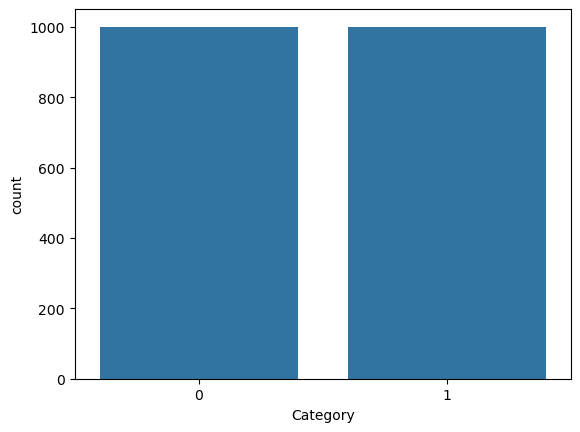

In [61]:
# Printing a graph showing the number of Spam emails vs. number of Non-Spam emails
sns.countplot(x='Category', data=data)
plt.show()

In [63]:
punctuations_list = string.punctuation

In [65]:
def remove_punctuations(text):
   temp = str.maketrans('', '', punctuations_list)
   return text.translate(temp)

In [103]:
data = data.dropna()
data['Message'] = data['Message'].apply(lambda x: remove_punctuations(x))
data.head()

,Message,Category
0,yearold cocksuckers download hot teen movies h...,1
1,hl p hl p short following days december th th ...,0
2,analyst hiring needs please read attached prov...,0
3,ask genevieve meeting give something special h...,1
4,sales panenergy exxon clear lake deal ticket f...,0


In [105]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)
    output = " ".join(imp_words)
    return output

In [107]:
# Sample of emails after having their stopwords and characters removed
data['Message'] = data['Message'].apply(lambda text: remove_stopwords(text))
data.head()

,Message,Category
0,yearold cocksuckers download hot teen movies h...,1
1,hl p hl p short following days december th th ...,0
2,analyst hiring needs please read attached prov...,0
3,ask genevieve meeting give something special h...,1
4,sales panenergy exxon clear lake deal ticket f...,0


In [109]:
## Reading in the code from Grace and Ally's data above
data2 = FinalDF_STEM
data2.head()

,00,000,000000,01,012,02,027,03,0310041,04,...,year,years,yes,yesterday,young,yvette,zero,zivley,zone,Label
0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.117039,0.0,0.0,0.0,0.0,spam
1,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,spam
2,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,spam
3,0.029606,0.028456,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,spam
4,0.000000,0.021651,0.0,0.0459,0.0,0.127537,0.0,0.025318,0.0,0.026251,...,0.031776,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,spam


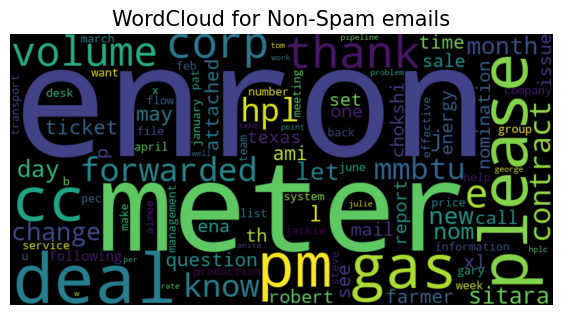

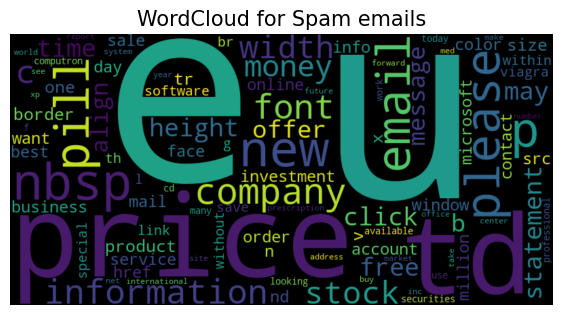

In [111]:
# Creating a word cloud visual of the most common words/tokens within each eamil type
email_corpus = " ".join(data[data['Category'] == 0]['Message'])
plt.figure(figsize=(7, 7))
wc = WordCloud(background_color='black',
               max_words=100,
               width=800,
               height=400,
               collocations=False).generate(email_corpus)

plt.imshow(wc, interpolation='bilinear')
plt.title(f'WordCloud for Non-Spam emails', fontsize=15)
plt.axis('off')
plt.show()



email_corpus = " ".join(data[data['Category'] == 1]['Message'])
plt.figure(figsize=(7, 7))
wc = WordCloud(background_color='black',
               max_words=100,
               width=800,
               height=400,
               collocations=False).generate(email_corpus)

plt.imshow(wc, interpolation='bilinear')
plt.title(f'WordCloud for Spam emails', fontsize=15)
plt.axis('off')
plt.show()

In [113]:
#train test split, using an 80/20 training data/testing data split
train_X, test_X, train_Y, test_Y = train_test_split(data['Message'],
                                                    data['Category'],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [115]:
train_Y.head()

811     1
1950    0
417     1
1278    0
544     0
Name: Category, dtype: int64

In [117]:
print("train_X.shape: ", train_X.shape)
print("test_X.shape:  ", test_X.shape)
print("train_Y.shape: ", train_Y.shape)
print("test_Y.shape:  ", test_Y.shape)

train_X.shape:  (1591,)
test_X.shape:   (398,)
train_Y.shape:  (1591,)
test_Y.shape:   (398,)


In [119]:
# Tokenize the data and preparing it for modeling
import pandas as pd

# Function to clean the dataset by converting all elements to strings and handling missing values
def preprocess_data(data):
    # Convert all elements to strings and handle missing values (replace with an empty string)
    return [str(x) if pd.notnull(x) else '' for x in data]

# Clean the training and testing datasets
train_X = preprocess_data(train_X)
test_X = preprocess_data(test_X)

# Tokenize the data and prepare it for modeling
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Define the maximum length for sequences
max_len = 100

# Pad the sequences
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

print("Data preprocessing complete!")


Data preprocessing complete!


In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))

# Add a Bidirectional LSTM
model.add(Bidirectional(LSTM(128, return_sequences=False, dropout=0.3)))

# Add a Dense layer with regularization
model.add(Dense(84, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))

# Add Batch Normalization
model.add(BatchNormalization())

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a smaller learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Build the model for a specific input shape
model.build(input_shape=(None, max_len))

# Print the model summary
model.summary()

D:\JupyterNotebook\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 64)        │     1,949,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 84)             │           336 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,169,401 (8.28 MB)

 Trainable params: 2,169,233 (8.27 MB)

 Non-trainable params: 168 (672.00 B)

In [123]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              optimizer = 'adam')

In [125]:
es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)

In [127]:
# Train the model
history = model.fit(train_sequences, train_Y,
                    validation_data=(test_sequences, test_Y),
                    epochs=20,
                    batch_size=32,
                    callbacks = [lr, es]
                   )

Epoch 1/20


D:\JupyterNotebook\Lib\site-packages\keras\src\backend\tensorflow\nn.py:750: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.6762 - loss: 1.6018 - val_accuracy: 0.9623 - val_loss: 1.1196 - learning_rate: 0.0010
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9746 - loss: 0.5488 - val_accuracy: 0.9523 - val_loss: 0.7040 - learning_rate: 0.0010
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9826 - loss: 0.2358 - val_accuracy: 0.9648 - val_loss: 0.4802 - learning_rate: 0.0010
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9972 - loss: 0.0844 - val_accuracy: 0.9598 - val_loss: 0.4215 - learning_rate: 0.0010
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9950 - loss: 0.0462 - val_accuracy: 0.9799 - val_loss: 0.2560 - learning_rate: 0.0010
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9993 - loss: 0.0190 - val_accuracy: 0.9774 - val_loss: 0.2072 - learning_rate: 0.0010
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9984 - loss: 0.0131 - val_accuracy: 0.

In [129]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

print(f'\nThe training accuracy turns out to be {test_accuracy*100:.2f}%,')

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9779 - loss: 0.2564
Test Loss : 0.2560040354728699
Test Accuracy : 0.979899525642395

The training accuracy turns out to be 97.99%,


In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

# Step 1: Vectorization with reduced features
MyVect_STEM = TfidfVectorizer(stop_words='english', max_features=2000)  # Reduced feature count

# Assuming `all_emails` contains email texts and `all_labels` contains labels ('spam' or 'ham')
X = MyVect_STEM.fit_transform(all_emails)
ColumnNames = MyVect_STEM.get_feature_names_out()

# Convert to DataFrame
FinalDF_STEM = pd.DataFrame(X.toarray(), columns=ColumnNames)
FinalDF_STEM["Label"] = all_labels

# Train-Test Split with a larger test set
X = FinalDF_STEM.drop("Label", axis=1)  # Features
y = FinalDF_STEM["Label"]              # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 30% test set

# Step 2: Train Random Forest with limited depth
clf = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)  # Reduced depth and trees
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = clf.predict(X_test)

# Print Classification Report for Random Forest
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Step 3: Train Logistic Regression with regularization
logistic_clf = LogisticRegression(C=0.5, max_iter=1000, random_state=42)  # Stronger regularization with lower C
logistic_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_clf.predict(X_test)

# Print Classification Report for Logistic Regression
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logistic))



Classification Report (Random Forest):
              precision    recall  f1-score   support

         ham       0.88      0.99      0.93      1084
        spam       0.96      0.68      0.80       468

    accuracy                           0.90      1552
   macro avg       0.92      0.84      0.87      1552
weighted avg       0.90      0.90      0.89      1552


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1084
        spam       0.97      0.96      0.96       468

    accuracy                           0.98      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.98      0.98      0.98      1552

